In [2]:
# !pip install torchaudio==0.9.0
import torch
import torch.nn as nn
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt
SR=16000
eps = 1e-6
DEV = 'cuda'
torch.set_printoptions(sci_mode=False)

### Download Dataset
- wget is a command for download a file from URL

In [3]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz


--2021-11-01 04:09:35--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G   736KB/s    in 40m 48s 

2021-11-01 04:50:25 (489 KB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]



### Unzip Dataset

In [4]:
!tar -xvzf genres.tar.gz

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/rock/rock.00016.wav
genres/rock/rock.00017.wav
genres/rock/rock.00018.wav
genres/rock/rock.00019.wav
genres/rock/rock.00020.wav
genres/rock/rock.00021.wav
genres/rock/rock.00022.wav
genres/rock/rock.00023.wav
genres/rock/rock.00024.wav
g

genres/pop/pop.00086.wav
genres/pop/pop.00087.wav
genres/pop/pop.00088.wav
genres/pop/pop.00089.wav
genres/pop/pop.00090.wav
genres/pop/pop.00091.wav
genres/pop/pop.00092.wav
genres/pop/pop.00093.wav
genres/pop/pop.00094.wav
genres/pop/pop.00095.wav
genres/pop/pop.00096.wav
genres/pop/pop.00097.wav
genres/pop/pop.00098.wav
genres/pop/pop.00099.wav
genres/metal/metal.00000.wav
genres/metal/metal.00001.wav
genres/metal/metal.00002.wav
genres/metal/metal.00003.wav
genres/metal/metal.00004.wav
genres/metal/metal.00005.wav
genres/metal/metal.00006.wav
genres/metal/metal.00007.wav
genres/metal/metal.00008.wav
genres/metal/metal.00009.wav
genres/metal/metal.00010.wav
genres/metal/metal.00011.wav
genres/metal/metal.00012.wav
genres/metal/metal.00013.wav
genres/metal/metal.00014.wav
genres/metal/metal.00015.wav
genres/metal/metal.00016.wav
genres/metal/metal.00017.wav
genres/metal/metal.00018.wav
genres/metal/metal.00019.wav
genres/metal/metal.00020.wav
genres/metal/metal.00021.wav
genres/metal

genres/hiphop/hiphop.00073.wav
genres/hiphop/hiphop.00074.wav
genres/hiphop/hiphop.00075.wav
genres/hiphop/hiphop.00076.wav
genres/hiphop/hiphop.00077.wav
genres/hiphop/hiphop.00078.wav
genres/hiphop/hiphop.00079.wav
genres/hiphop/hiphop.00080.wav
genres/hiphop/hiphop.00081.wav
genres/hiphop/hiphop.00082.wav
genres/hiphop/hiphop.00083.wav
genres/hiphop/hiphop.00084.wav
genres/hiphop/hiphop.00085.wav
genres/hiphop/hiphop.00086.wav
genres/hiphop/hiphop.00087.wav
genres/hiphop/hiphop.00088.wav
genres/hiphop/hiphop.00089.wav
genres/hiphop/hiphop.00090.wav
genres/hiphop/hiphop.00091.wav
genres/hiphop/hiphop.00092.wav
genres/hiphop/hiphop.00093.wav
genres/hiphop/hiphop.00094.wav
genres/hiphop/hiphop.00095.wav
genres/hiphop/hiphop.00096.wav
genres/hiphop/hiphop.00097.wav
genres/hiphop/hiphop.00098.wav
genres/hiphop/hiphop.00099.wav
genres/disco/disco.00000.wav
genres/disco/disco.00001.wav
genres/disco/disco.00002.wav
genres/disco/disco.00003.wav
genres/disco/disco.00004.wav
genres/disco/disco

genres/classical/classical.00035.wav
genres/classical/classical.00036.wav
genres/classical/classical.00037.wav
genres/classical/classical.00038.wav
genres/classical/classical.00039.wav
genres/classical/classical.00040.wav
genres/classical/classical.00041.wav
genres/classical/classical.00042.wav
genres/classical/classical.00043.wav
genres/classical/classical.00044.wav
genres/classical/classical.00045.wav
genres/classical/classical.00046.wav
genres/classical/classical.00047.wav
genres/classical/classical.00048.wav
genres/classical/classical.00049.wav
genres/classical/classical.00050.wav
genres/classical/classical.00051.wav
genres/classical/classical.00052.wav
genres/classical/classical.00053.wav
genres/classical/classical.00054.wav
genres/classical/classical.00055.wav
genres/classical/classical.00056.wav
genres/classical/classical.00057.wav
genres/classical/classical.00058.wav
genres/classical/classical.00059.wav
genres/classical/classical.00060.wav
genres/classical/classical.00061.wav
g

### Downsample and Save in PyTorch file

In [5]:
from pathlib import Path
datadir = Path('genres/')
audio_files = datadir.rglob('*.wav')
for fn in audio_files:
  # y, sr = librosa.core.load(fn, sr=SR)
  y, sr = torchaudio.load(fn)
  y = torchaudio.transforms.Resample(orig_freq=sr, new_freq=SR)(y)
  y.squeeze_()
  torch.save(y, fn.with_suffix('.pt'))


In [9]:
ipd.Audio(y, rate=SR)

In [10]:
fn

PosixPath('genres/country/country.00075.wav')

## 1. Define Dataset and Dataloader
- torch 

In [8]:
from torch.utils.data import Dataset, DataLoader

In [11]:
class AudioSet(Dataset):
  def __init__(self, dir_path, sr, split_type):
    if isinstance(dir_path, str):
      dir_path = Path(dir_path)
    self.dir = dir_path
    self.sr = sr
  
    pt_files = self.dir.rglob('*.pt')
    if split_type == "train":
      pt_files = [x for x in pt_files if int(x.stem.split('.')[1]) < 60]
    elif split_type == "valid":
      pt_files = [x for x in pt_files if 60 <= int(x.stem.split('.')[1]) < 80]
    elif split_type == "test":
      pt_files = [x for x in pt_files if  int(x.stem.split('.')[1]) >= 80]
    self.audio = [torch.load(x) for x in pt_files]
    self.label = [x.stem.split('.')[0] for x in pt_files]
    
    genre_names = list(set(self.label))
    self.gnr_to_id = {x:i for i, x in enumerate(genre_names)}

  def __getitem__(self, idx):
    return self.audio[idx][:self.sr*3], self.gnr_to_id[self.label[idx]]
    # selected_audio = self.audio[idx]
    # sliced_audio = selected_audio[self.sr*10:self.sr*13]

  def __len__(self):
    return len(self.audio)

  
dataset = AudioSet('genres/', SR, split_type="train")

In [17]:
ipd.Audio(dataset.audio[0], rate=dataset.sr)

In [23]:
# 한 오디오 샘플의 전체 개수 / sampling rate 
len(dataset.audio[0]) / dataset.sr

30.013375

In [21]:
alist = [0,1,2,3,4]
print(alist[2])
dataset[2] # __getitem__ 호출

2

In [26]:
print(dataset.gnr_to_id)
print(dataset.gnr_to_id['jazz'])

{'classical': 0, 'pop': 1, 'rock': 2, 'reggae': 3, 'disco': 4, 'metal': 5, 'jazz': 6, 'blues': 7, 'country': 8, 'hiphop': 9}
6


### 1-1: Test how batch looks like

In [27]:
batch = [dataset[i] for i in range(32)]
batch

[(tensor([-0.0222, -0.0284, -0.0296,  ...,  0.1976,  0.2544,  0.2497]), 3),
 (tensor([ 0.0024,  0.0034,  0.0153,  ..., -0.0327, -0.0194,  0.0040]), 3),
 (tensor([-0.0442, -0.0681, -0.0674,  ...,  0.0900,  0.0907,  0.0906]), 3),
 (tensor([-0.0833, -0.1423, -0.1194,  ..., -0.0916, -0.0739, -0.0604]), 3),
 (tensor([-0.0103,  0.0234,  0.0148,  ..., -0.1019, -0.1124, -0.1300]), 3),
 (tensor([-0.0132, -0.0258, -0.0183,  ...,  0.0184,  0.0114,  0.0007]), 3),
 (tensor([ 0.0074,  0.0163,  0.0788,  ..., -0.0066,  0.0022, -0.0059]), 3),
 (tensor([-0.0123, -0.0113,  0.0195,  ..., -0.0023, -0.0056, -0.0081]), 3),
 (tensor([-0.1318, -0.1163, -0.0536,  ...,  0.0673,  0.0759,  0.0808]), 3),
 (tensor([-0.0224, -0.0380, -0.0367,  ..., -0.1112, -0.1141, -0.0972]), 3),
 (tensor([-0.0665, -0.0618,  0.0247,  ..., -0.0061, -0.0050, -0.0081]), 3),
 (tensor([-0.0387, -0.0475, -0.0504,  ...,  0.1436,  0.1393,  0.0779]), 3),
 (tensor([ 0.0063,  0.0064,  0.0210,  ..., -0.0480, -0.0375, -0.0485]), 3),
 (tensor([ 0

### 1-2: Define a collate function that makes batch to Tensor

In [31]:
def collate_audio_and_label(batch):
  audio = torch.stack([x[0] for x in batch])
  label = torch.LongTensor([x[1] for x in batch])
  return audio, label

audio, label = collate_audio_and_label(batch)

In [32]:
print(audio)
print(label)

tensor([[-0.0222, -0.0284, -0.0296,  ...,  0.1976,  0.2544,  0.2497],
        [ 0.0024,  0.0034,  0.0153,  ..., -0.0327, -0.0194,  0.0040],
        [-0.0442, -0.0681, -0.0674,  ...,  0.0900,  0.0907,  0.0906],
        ...,
        [-0.0373, -0.0536, -0.0427,  ...,  0.2033,  0.1665,  0.1489],
        [-0.0018, -0.0031, -0.0042,  ...,  0.0947,  0.0459,  0.0272],
        [-0.0371, -0.0581,  0.0011,  ..., -0.0273, -0.0181,  0.0059]])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3])


### 1-3 DataLoader
- PyTorch Class for handling data pipeline
  - dataset: a dataset object that feeds data to DataLoader
  - collate_fn: a function to collate the sampled data from thedataset
  - batch_size: Number of samples per batch
  - shuffle: Whether to load data with shuffled order

In [33]:
train_loader = DataLoader(dataset=dataset, batch_size=64, collate_fn=collate_audio_and_label, shuffle=True, pin_memory=True)
# dataloader = DataLoader(dataset=dataset, batch_size=64)
next(iter(train_loader))

[tensor([[ 0.0050,  0.0577,  0.0858,  ..., -0.0546, -0.0560, -0.0612],
         [ 0.0343,  0.0456,  0.0318,  ...,  0.0204,  0.0255,  0.0255],
         [-0.0384, -0.0694, -0.1687,  ..., -0.1725, -0.1488, -0.0907],
         ...,
         [ 0.1909,  0.1774,  0.0728,  ...,  0.4323,  0.4388,  0.3933],
         [ 0.0489,  0.0693,  0.0450,  ..., -0.1471, -0.1348, -0.0122],
         [ 0.0690,  0.0648,  0.0492,  ..., -0.0953, -0.1001, -0.1060]]),
 tensor([8, 8, 5, 5, 7, 2, 6, 4, 4, 7, 5, 4, 7, 9, 5, 9, 8, 1, 6, 1, 4, 2, 4, 5,
         1, 8, 6, 0, 6, 5, 1, 0, 0, 8, 4, 2, 9, 0, 6, 4, 8, 7, 4, 0, 9, 5, 2, 8,
         0, 9, 0, 4, 9, 5, 5, 3, 0, 3, 5, 5, 7, 9, 6, 3])]

In [35]:
batch = next(iter(train_loader))

## 2 Define Neural Network
- 신경망의 구조를 설계하기
- 신경망 학습의 순서:
  1. 신경망의 구조를 정의한다 (Class)
  2. 구조를 따르는 모델을 선언한다 (object)
  3. 모델의 내부에 있는 파라미터들을 데이터를 이용해 학습한다.
    - 파라미터란 신경망 내부 뉴런들의 가중치와 편향치
 

In [44]:
class GenreClassifier(nn.Module):
  def __init__(self, output_size, hidden_size, sr, n_fft, f_max, n_mels):
    super().__init__()
    self.sr = sr
    self.mel_converter = torchaudio.transforms.MelSpectrogram(sample_rate=self.sr, n_fft=n_fft,f_max=f_max,n_mels=n_mels )
    self.amp_to_db_converter = torchaudio.transforms.AmplitudeToDB()
    
    self.layer0 = nn.Linear(in_features=n_mels, out_features=hidden_size)
    self.layer1 = nn.Linear(in_features=hidden_size, out_features=hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    # x: Audio Sample 
    # 오디오 샘플을 입력으로 받아 스펙트로그램으로 변환
    spec = self.mel_converter(x)
    db_spec = self.amp_to_db_converter(spec)

    # 신경망 계산
    out = self.layer0(db_spec.transpose(-2,-1))
    out = torch.relu(out)
    out = self.layer1(out)
    out = torch.relu(out)
    out = self.layer2(out)
    return out
    # out = torch.max(out, dim=1)[0]
    # # return out
    # return torch.softmax(out, dim=-1)


model = GenreClassifier(output_size=10, hidden_size=32, sr=SR, n_fft=1024, f_max=8000, n_mels=48)
model = model.to(DEV) # model을 DEV로 옮김. DEV=='cuda'이면 모델을 GPU로 옮김

In [38]:
batch
audio, label = batch 
# 밑과 위는 동치
# audio = batch[0]
# label = batch[1]

### 2-1 Test our model can handle the input data
- Give a single data and test model.forward()
  - It is better to keep dimension `1 x L`, rather than `L`
    - Because we will handle data as a batch which have dimension of `N x L`
- Check output shape

In [45]:
# 모델의 입력은 오디오
# model.forward(audio) 와 동일함
model(audio)


RuntimeError: ignored

### CPU와 GPU
CPU는 일반적인 연산을 하는데 유리하고

GPU는 매트릭스 연산을 하는데 매우 유리함

- GPU를 사용하기 위해서는 device를 `'cuda'`로 설정해야함

In [57]:
audio = audio.to(DEV)
output = model(audio)
output.shape # batch size, time frame size, class size

torch.Size([64, 94, 10])

In [48]:
print(audio.shape)
audio[5] # 5번째 곡을 선택
audio[10,:16000] # 10번째 곡의 첫 16000개의 오디오샘플을 선택

torch.Size([64, 48000])

In [51]:
mel_spec = model.mel_converter(audio)
mel_spec.shape

torch.Size([64, 48, 94])

In [55]:
audio.shape[1] / model.mel_converter.hop_length

93.75

In [59]:
output[0,:,0] # 0번째 곡, 0번째 시간 프레임부터 마지막 시간 프레임 까지, 0번째 장르 클래스 (classical)라고 생각하는 정도 

tensor([ 0.5021,  0.4221,  0.5071,  0.6610,  0.4077,  0.4460,  0.2029,  0.3484,
         0.4708,  0.5275,  0.4635, -0.2472,  0.5970,  0.5795,  1.1019,  0.1488,
         0.4140, -0.0475,  0.4595,  0.3610,  0.0990,  0.2427,  0.5610, -0.0488,
         0.1346,  0.7972,  0.5631,  0.3243,  0.3143,  0.0656,  1.0398,  0.1186,
        -0.2729, -0.1923,  0.2900,  0.3995,  0.4332,  0.6344,  0.6008,  0.5653,
         0.8054,  0.9640,  1.0638,  0.2613,  0.1283, -0.3149, -0.2505, -0.0498,
        -0.3684,  0.0594,  0.0069, -0.0949,  0.3153,  0.1337,  0.3139, -0.1960,
        -0.2858, -0.0227,  0.1229,  0.1987, -0.2250, -0.2712,  0.6773,  0.4669,
         0.3229,  0.0776, -0.0555, -0.2605,  0.2076,  0.1584,  0.2400,  0.2551,
         0.1138,  0.0065,  0.3076,  0.3757, -0.0680,  0.0654,  0.1256, -0.0173,
        -0.0055,  0.0340, -0.3165, -0.1314,  0.0219,  0.0219,  0.1661,  0.6119,
         0.1919, -0.3657, -0.7794, -0.2779, -0.0970,  0.1901], device='cuda:0',
       grad_fn=<SelectBackward>)

In [60]:
torch.max(output[0,:,0])

tensor(1.1019, device='cuda:0', grad_fn=<MaxBackward1>)

In [68]:
# 어떻게하면 위 연산을 모든 곡, 모든 장르에 대해서 할 수 있을까
max_value = torch.max(output, dim=1)[0]
print(max_value.shape) # 곡 수 X 장르 수
print(max_value[32, 5]) # 32번째 곡이 5번째 장르라고 생각하는 정도

torch.Size([64, 10])
tensor(2.1804, device='cuda:0', grad_fn=<SelectBackward>)


In [71]:
def softmax(atensor, dim):
  exp_val = torch.exp(atensor)
  exp_sum = torch.sum(exp_val, dim=dim, keepdim=True) #keepdim을 하면 exp_val.shape == exp_sum.shape을 만족
  return exp_val/exp_sum
softmax_out = softmax(max_value, dim=1)
print(softmax_out[0])

tensor([0.0180, 0.0431, 0.0570, 0.0585, 0.0371, 0.0280, 0.0259, 0.1878, 0.0157,
        0.5288], device='cuda:0', grad_fn=<SelectBackward>)


## 3. Make a Train Loop
- Define optimizer
- Define loss function
- Make iteration based on number of epochs
  - If the entire sample in a training dataset has been used for model update, it is called an epoch
  - There can be several batches per epoch

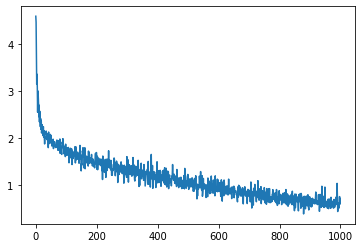

In [73]:
lr = 0.001

model = GenreClassifier(output_size=10, hidden_size=32, sr=SR, n_fft=1024, f_max=8000, n_mels=48)
model = model.to(DEV)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = torch.nn.NLLLoss()
loss_record =[]

num_epochs = 100
for epoch in range(num_epochs):
  for batch in train_loader:

    audio, label = batch
    pred = model(audio.to(DEV))
    max_pred = torch.max(pred, dim=1)[0]
    softmax_pred = softmax(max_pred, dim=1)
    loss = loss_function(torch.log(softmax_pred), label.to(DEV))
    loss.backward() #backpropagation / make gradient for each parameter
    optimizer.step() # parameter update
    optimizer.zero_grad() 

    loss_record.append(loss.item())

plt.plot(loss_record)

## 4.Get Validation Accuracy
- Define accuracy as a function

In [75]:
def get_accuracy(pred, target):
  return (torch.sum(torch.argmax(pred, dim=-1)==target) / len(pred)).item()
get_accuracy(softmax_pred, label.to(DEV))

0.7916666865348816

In [87]:
valid_set = AudioSet('genres/', sr=SR, split_type='valid')
valid_loader = DataLoader(valid_set, batch_size = 64)

def validate(model, valid_loader, dev=DEV):
  with torch.no_grad():
    val_acc = 0
    for batch in valid_loader:
      audio, label = batch
      pred = model(audio.to(dev))
      # max_pred = torch.max(pred, dim=1)[0]
      softmax_pred = softmax(max_pred, dim=1)
      accuracy = get_accuracy(softmax_pred, label.to(dev))
      val_acc += accuracy * len(pred)

  val_acc /= len(valid_loader.dataset)
  return val_acc
print(validate(model, valid_loader)) 

RuntimeError: ignored

## 5. Make train loop with validation


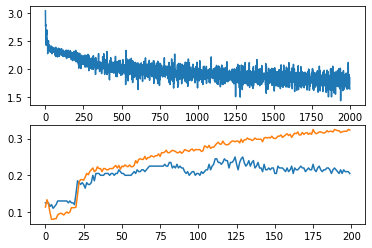

In [80]:
lr = 0.001
eps = 1e-6
model = GenreClassifier(output_size=10, hidden_size=4, sr=SR, n_fft=1024, f_max=8000, n_mels=48)
model = model.to(DEV)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = torch.nn.NLLLoss()
loss_record =[]
val_acc_record = []
train_acc_record = []

num_epochs = 200
for epoch in range(num_epochs):
  train_acc = 0
  for batch in train_loader:
    optimizer.zero_grad()
    audio, label = batch
    pred = model(audio.to(DEV))
    max_pred = torch.max(pred, dim=1)[0]
    softmax_pred = softmax(max_pred, dim=1)
    loss = loss_function(torch.log(softmax_pred+eps), label.to(DEV))
    loss.backward()
    optimizer.step()
    loss_record.append(loss.item())
    batch_train_accuracy = get_accuracy(softmax_pred, label.to(DEV))
    train_acc += batch_train_accuracy * len(audio)
  
  train_acc /= len(train_loader.dataset)
  train_acc_record.append(train_acc)
  # for each epoch, check validation accuracy
  val_acc = validate(model, valid_loader, dev=DEV)
  val_acc_record.append(val_acc)

plt.subplot(2,1,1)
plt.plot(loss_record)
plt.subplot(2,1,2)
plt.plot()
plt.plot(val_acc_record)
plt.plot(train_acc_record)

## 6. Let's Train a Better Model
- Goal: get better validation accuracy
- How: Make a function that automate train & validation for given hyperparameters
  - Data Loader
    - batch size
    - shuffle
  - Model
    - hidden size
    - number of layers
    - way to handle multiple frame
    

In [85]:
class GenreClassifierV2(nn.Module):
  def __init__(self, output_size, hidden_size, sr, n_fft, f_max, n_mels):
    super().__init__()
    self.sr = sr
    self.mel_converter = torchaudio.transforms.MelSpectrogram(sample_rate=self.sr, n_fft=n_fft,f_max=f_max,n_mels=n_mels )
    self.amp_to_db_converter = torchaudio.transforms.AmplitudeToDB()
    
    self.num_receptive_time_frame = 10
    self.layer0 = nn.Linear(in_features=n_mels*self.num_receptive_time_frame, out_features=hidden_size) # mel_spectrogram 5개를 한번에 보는 Linear layer
    self.layer1 = nn.Linear(in_features=hidden_size, out_features=hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    # x: Audio Sample 
    # 오디오 샘플을 입력으로 받아 스펙트로그램으로 변환
    spec = self.mel_converter(x)
    db_spec = self.amp_to_db_converter(spec) # batch X frequency X time
    db_spec = db_spec[:, :, 0:self.num_receptive_time_frame] # batch X frequency X self.num_receptive_time_frame
    db_spec = db_spec.reshape(db_spec.shape[0], -1) # batch X (frequency x self.num_receptive_time_frame)
    # 신경망 계산
    out = self.layer0(db_spec)
    out = torch.relu(out)
    out = self.layer1(out)
    out = torch.relu(out)
    out = self.layer2(out)
    return out

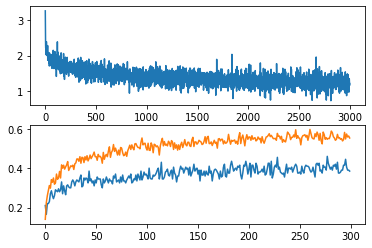

In [104]:
lr = 0.001
eps = 1e-6
model = GenreClassifierV2(output_size=10, hidden_size=32, sr=SR, n_fft=1024, f_max=8000, n_mels=48)
model = model.to(DEV)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_function = torch.nn.NLLLoss()
loss_record =[]
val_acc_record = []
train_acc_record = []


def validate(model, valid_loader, dev=DEV):
  with torch.no_grad():
    val_acc = 0
    for batch in valid_loader:
      audio, label = batch
      pred = model(audio.to(dev))
      # max_pred = torch.max(pred, dim=1)[0]
      softmax_pred = softmax(pred, dim=1)
      accuracy = get_accuracy(softmax_pred, label.to(dev))
      val_acc += accuracy * len(pred)
  val_acc /= len(valid_loader.dataset)
  return val_acc

num_epochs = 300
for epoch in range(num_epochs):
  train_acc = 0
  for batch in train_loader:
    optimizer.zero_grad()
    audio, label = batch
    pred = model(audio.to(DEV))
    softmax_pred = softmax(pred, dim=1)
    loss = loss_function(torch.log(softmax_pred+1e-4), label.to(DEV))
    loss.backward()
    optimizer.step()
    loss_record.append(loss.item())
    batch_train_accuracy = get_accuracy(softmax_pred, label.to(DEV))
    train_acc += batch_train_accuracy * len(audio)
  
  train_acc /= len(train_loader.dataset)
  train_acc_record.append(train_acc)
  # for each epoch, check validation accuracy
  val_acc = validate(model, valid_loader, dev=DEV)
  val_acc_record.append(val_acc)

plt.subplot(2,1,1)
plt.plot(loss_record)
plt.subplot(2,1,2)
plt.plot()
plt.plot(val_acc_record)
plt.plot(train_acc_record)

In [17]:
def run_train(model, train_loader, valid_loader, optimizer, loss_function, num_epochs):
  loss_record =[]
  val_acc_record = []
  train_acc_record = []

  for epoch in range(num_epochs):
    train_acc = 0
    for batch in train_loader:
      optimizer.zero_grad()
      audio, label = batch
      pred = model(audio.to(DEV))
      loss = loss_function(torch.log(pred+eps), label.to(DEV))
      loss.backward()
      optimizer.step()
      loss_record.append(loss.item())
      batch_train_accuracy = get_accuracy(pred, label.to(DEV))
      train_acc += batch_train_accuracy * len(audio)
    
    train_acc /= len(train_loader.dataset)
    train_acc_record.append(train_acc)
    # for each epoch, check validation accuracy
    val_acc = validate(model, valid_loader, dev=DEV)
    val_acc_record.append(val_acc)
  return loss_record, train_acc_record, val_acc_record

def plot_result(loss, train_acc, val_acc):
  plt.subplot(2,1,1)
  plt.plot(loss)
  plt.subplot(2,1,2)
  plt.plot()
  plt.plot(train_acc)
  plt.plot(val_acc)

loss_record, train_acc_record, val_acc_record = run_train(model, train_loader, valid_loader, optimizer, loss_function, 1)
print(loss_record, train_acc_record, val_acc_record)

[0.009946857579052448, 0.0285022035241127, 0.009786340408027172, 0.008972634561359882, 0.010058724321424961, 0.009847673587501049, 0.013500130735337734, 0.011813498102128506, 0.012011934071779251, 0.006164839491248131] [0.9983333333333333] [0.355]


In [102]:
import random

class RandomAudioSet(AudioSet):
  def __init__(self, dir_path, sr, split_type):
    super().__init__(dir_path, sr, split_type)
  
  def __getitem__(self, idx):
    audio = self.audio[idx]
    rand_slice_pos = random.randint(0, len(audio)-3*self.sr-1)
    audio = audio[rand_slice_pos:rand_slice_pos+3*self.sr]
    label = self.gnr_to_id[self.label[idx]]
    return audio, label

train_set = RandomAudioSet('genres/', SR, 'train')
train_loader = DataLoader(train_set, batch_size=64, shuffle=True,pin_memory=True)


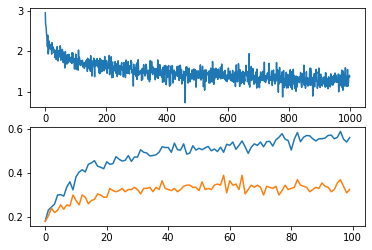

In [18]:
import random
class RandomAudioSet(AudioSet):
  def __init__(self, dir_path, sr, split_type):
    super().__init__(dir_path, sr, split_type)
  
  def __getitem__(self, idx):
    audio = self.audio[idx]
    rand_slice_pos = random.randint(0, len(audio)-3*self.sr-1)
    audio = audio[rand_slice_pos:rand_slice_pos+3*self.sr]
    label = self.gnr_to_id[self.label[idx]]
    return audio, label
  
train_set = RandomAudioSet('genres/', SR, 'train')
train_loader = DataLoader(train_set, batch_size=64, shuffle=True,pin_memory=True)

model = GenreClassifier(output_size=10, hidden_size=32, sr=SR, n_fft=1024, f_max=8000, n_mels=48)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_record, train_acc_record, val_acc_record = run_train(model, train_loader, valid_loader, optimizer, loss_function, 100)
plot_result(loss_record, train_acc_record, val_acc_record)

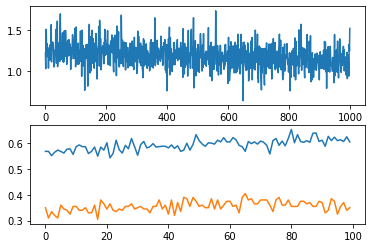

In [19]:
loss_record, train_acc_record, val_acc_record = run_train(model, train_loader, valid_loader, optimizer, loss_function, 100)
plot_result(loss_record, train_acc_record, val_acc_record)

#### Show progress bar with tqdm
- tqdm.tqdm automatically shows 
  - Caution: the module's name is tqdm and also the function name is tqdm. You have to use `from tqdm import tqdm` or `tqdm.tqdm(range(num_epochs))`

In [20]:
!pip install tqdm
from tqdm import tqdm

100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


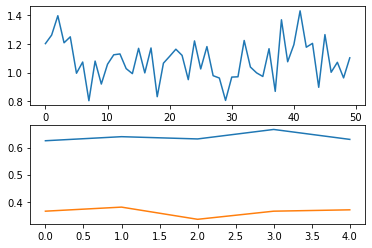

In [21]:
def run_train(model, train_loader, valid_loader, optimizer, loss_function, num_epochs):
  loss_record =[]
  val_acc_record = []
  train_acc_record = []

  for epoch in tqdm(range(num_epochs)): # Here is the change
    train_acc = 0
    for batch in train_loader:
      optimizer.zero_grad()
      audio, label = batch
      pred = model(audio.to(DEV))
      loss = loss_function(torch.log(pred+eps), label.to(DEV))
      loss.backward()
      optimizer.step()
      loss_record.append(loss.item())
      batch_train_accuracy = get_accuracy(pred, label.to(DEV))
      train_acc += batch_train_accuracy * len(audio)
    
    train_acc /= len(train_loader.dataset)
    train_acc_record.append(train_acc)
    # for each epoch, check validation accuracy
    val_acc = validate(model, valid_loader, dev=DEV)
    val_acc_record.append(val_acc)
  return loss_record, train_acc_record, val_acc_record

loss_record, train_acc_record, val_acc_record = run_train(model, train_loader, valid_loader, optimizer, loss_function, 5)
plot_result(loss_record, train_acc_record, val_acc_record)

## Linear Model that can see more times

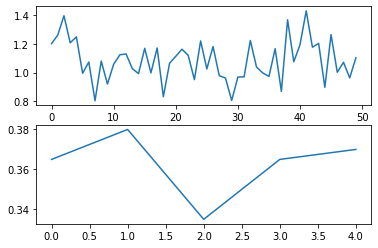

In [22]:

plt.subplot(2,1,1)
plt.plot(loss_record)
plt.subplot(2,1,2)
plt.plot(val_acc_record)